# Défi Grosses Data 2018

## Data analysis

In [236]:
import numpy as np
import pandas as pd
import datetime as dt
from os import listdir
import Annex

Importe les données concaténées:

In [237]:
df=Annex.get_data_raw()
df.shape

(189280, 31)

Importe les données séparées par type:

In [29]:
meteo_quant, meteo_qual, meteo_date, meteo_y=Annex.get_data_tidied()

Remplace les variables qualitatives par leur indicatrices.

**Attention, ici seuls "mois" et "insee" sont considérés qualitatives!** (what about the wind? what about the "ech"?)

In [241]:
df_dummies=pd.get_dummies(df[['mois','insee']])
df_full_qtt=pd.concat([df,df_dummies],axis=1)
df_full_qtt=df_full_qtt.drop(['mois','insee'],axis=1)

Sépare les échantillons d'apprentissage et de test

In [242]:
from sklearn.model_selection import train_test_split
Y=df_full_qtt['tH2_obs']
X=df_full_qtt
X=X.drop(['tH2_obs','date'],axis=1) ## !!! Date?
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=11)
X_train.shape, X_test.shape

((132496, 46), (56784, 46))

In [192]:
#date=df['date'].iloc[0].strftime('%Y-%m-%d')

In [195]:
#vect_date=df['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
#vect_stat=df['insee']==df_tot['insee'].iloc[0]

In [238]:
#plt.plot(df_tot['tH2_obs'][df_tot['date'][(vect_date.str.find(date)==0)].index==1].values)

In [239]:
#plt.plot(df_tot['tH2_obs'][(vect_date.str.find(date)==0)&(vect_stat==True)].as_matrix())

In [243]:
df.describe()

,tH2_obs,capeinsSOL0,ciwcH20,clwcH20,ffH10,flir1SOL0,fllat1SOL0,flsen1SOL0,flvis1SOL0,hcoulimSOL0,...,rrH20,tH2,tH2_VGrad_2.100,tH2_XGrad,tH2_YGrad,tpwHPA850,ux1H10,vapcSOL0,vx1H10,ech
count,189260.000000,170492.000000,1.883070e+05,184800.000000,184702.000000,188118.000000,1.882190e+05,1.881510e+05,1.881810e+05,188307.000000,...,184793.000000,184723.000000,184716.000000,184723.000000,184723.000000,188258.000000,184702.000000,188286.000000,184716.000000,189280.000000
mean,12.006981,59.169631,5.027560e-08,0.000006,3.406578,-217648.413598,-1.476294e+05,-7.151363e+04,4.136244e+05,490.318652,...,0.003668,12.143805,-0.183838,0.001031,0.000351,9.477384,1.128499,17.538598,0.732079,16.898669
std,6.263605,142.986766,1.058130e-06,0.000035,2.069121,133170.495298,2.338682e+05,2.379013e+05,6.915170e+05,505.990997,...,0.022547,6.495621,1.890783,0.002268,0.003244,4.502674,4.963149,7.752743,4.872846,9.548489
min,-7.900000,0.000000,0.000000e+00,0.000000,0.008230,-816882.554121,-1.780445e+06,-1.889882e+06,0.000000e+00,0.096693,...,0.000000,-9.776349,-9.275321,-0.022873,-0.021223,-3.477451,-22.470358,1.305881,-20.111824,1.000000
25%,7.600000,0.124246,0.000000e+00,0.000000,1.924383,-302011.786091,-1.970599e+05,-8.946848e+04,0.000000e+00,117.687765,...,0.000000,7.527034,-1.271802,-0.000110,-0.000649,6.218264,-2.001309,11.556538,-2.746925,9.000000
50%,11.600000,5.425625,0.000000e+00,0.000000,2.990316,-222379.297816,-4.894289e+04,-1.954219e+03,3.600000e-12,321.587923,...,0.000000,11.855420,-0.588375,0.000741,0.000304,9.426134,0.850176,16.337755,0.501839,17.000000
75%,16.100000,47.025052,0.000000e+00,0.000000,4.438814,-107138.680673,-2.580780e+02,4.394024e+04,5.918494e+05,709.740217,...,0.000000,16.400056,0.554582,0.001957,0.001603,12.702356,3.981172,22.293404,4.015721,25.000000
max,38.400002,2448.672118,6.457207e-05,0.000447,17.449989,78624.299681,1.857474e+05,6.836656e+05,3.206372e+06,5289.707727,...,1.754839,39.642168,11.714195,0.028023,0.031406,22.606778,29.156881,54.592355,26.574025,36.000000


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189280 entries, 0 to 2134
Data columns (total 31 columns):
date               189280 non-null datetime64[ns]
insee              189280 non-null category
tH2_obs            189260 non-null float64
capeinsSOL0        170492 non-null float64
ciwcH20            188307 non-null float64
clwcH20            184800 non-null float64
ddH10_rose4        184702 non-null category
ffH10              184702 non-null float64
flir1SOL0          188118 non-null float64
fllat1SOL0         188219 non-null float64
flsen1SOL0         188151 non-null float64
flvis1SOL0         188181 non-null float64
hcoulimSOL0        188307 non-null float64
huH2               184723 non-null float64
iwcSOL0            188307 non-null float64
nbSOL0_HMoy        188293 non-null float64
nH20               178493 non-null float64
ntSOL0_HMoy        188293 non-null float64
pMER0              184471 non-null float64
rr1SOL0            188265 non-null float64
rrH20              184

In [245]:
np.shape(df)

(189280, 31)

In [246]:
N_withNA=df.shape[0]
N_withNA

189280

In [247]:
df_clean=df.dropna(axis=0)
N_withoutNA=df_clean.shape[0]
print("Nous avons éliminé %d données soit %0.2f %s"%(N_withNA-N_withoutNA,(N_withNA-N_withoutNA)/N_withNA*100,'%'))

Nous avons éliminé 26528 données soit 14.02 %


In [248]:
## remplacer les mois par des int
df_dummies=pd.get_dummies(df_clean[['mois']])
df_clean_c=pd.concat([df_clean,df_dummies],axis=1)
df_clean_c=df_clean_c.drop(['mois'],axis=1)

df_dummies=pd.get_dummies(df_clean_c[['insee']])
df_clean_c=pd.concat([df_clean_c,df_dummies],axis=1)
df_clean_c=df_clean_c.drop(['insee'],axis=1)

df_dummies=pd.get_dummies(df_clean_c[['ddH10_rose4']])
df_clean_c=pd.concat([df_clean_c,df_dummies],axis=1)
df_clean_c=df_clean_c.drop(['ddH10_rose4'],axis=1)

In [249]:
from sklearn.model_selection import train_test_split  
Y=df_clean_c['tH2_obs']
X=df_clean_c
X=X.drop(['tH2_obs'],axis=1)
X=X.drop(['date'],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=11)

## Modèle Linéaire et sélection de variables / Lasso style

In [250]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [251]:
reg=linear_model.Lasso()
model=reg.fit(X_train,Y_train)

In [252]:
prev=reg.predict(X_test)
print(prev.shape)
print("MSE =",mean_squared_error(Y_test,prev))
print("R2 =",r2_score(Y_test,prev))

(48826,)
MSE = 1.8082717877
R2 = 0.953939650649


In [253]:
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Y_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.957471, Meilleur paramètre = {'alpha': 0.05}


Prévision avec la valeur optimale de alpha :

In [254]:
prev=regLassOpt.predict(X_test)
print("MSE =",mean_squared_error(prev,Y_test))
print("R2 =",r2_score(Y_test,prev))

MSE = 1.62901984203
R2 = 0.958505561203


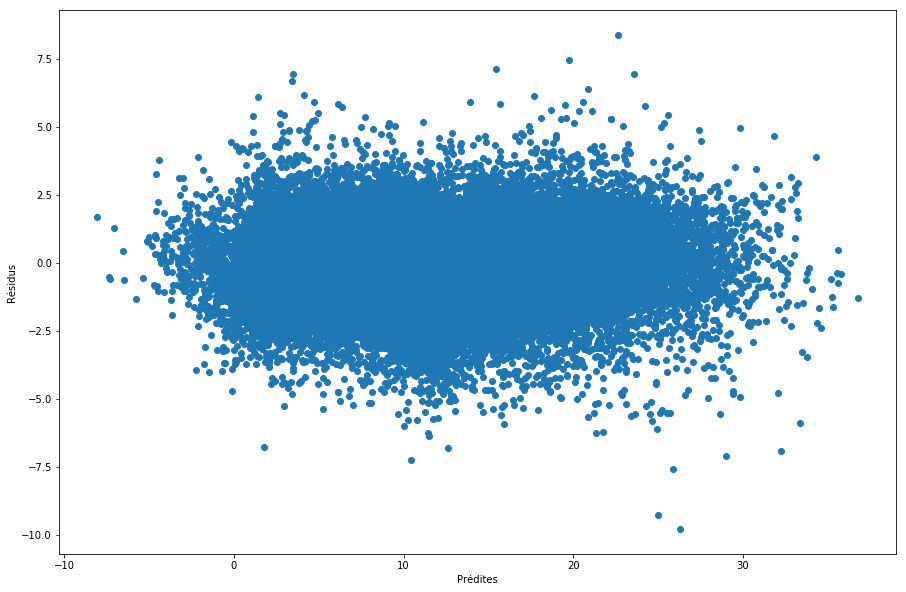

In [256]:
plt.figure(figsize=(15,10))
plt.plot(prev,Y_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.show()

In [257]:
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(X_train,Y_train)
model_lasso.coef_
coef = pd.Series(model.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 8 variables et en supprime 41


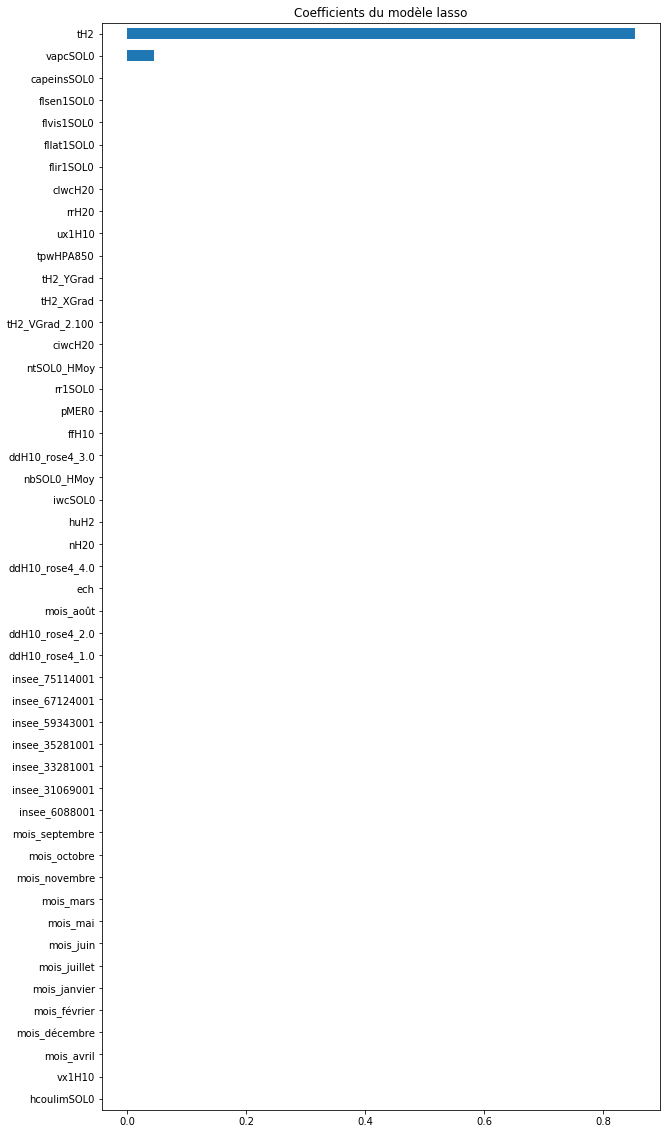

In [259]:
imp_coef = coef.sort_values()
plt.figure(figsize=(10,20))
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

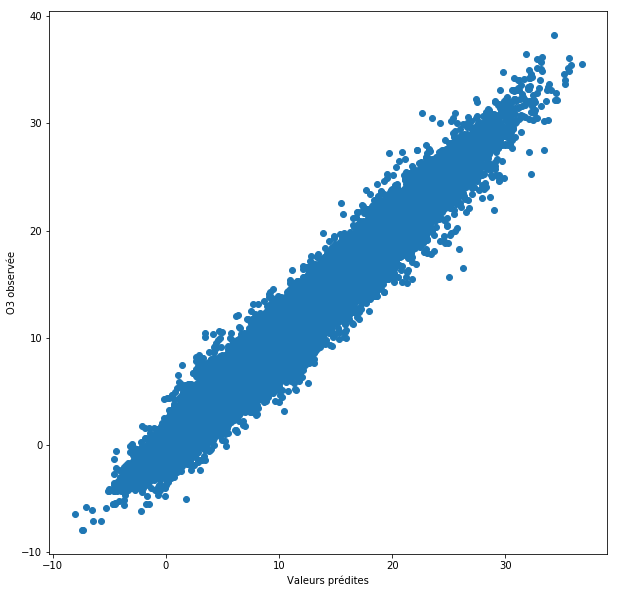

In [260]:
plt.figure(figsize=(10,10))
plt.plot(prev,Y_test,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"O3 observée")
plt.show()

Dénombrement des erreurs par matrice de confusion

In [261]:
table=pd.crosstab(prev>10,Y_test>10)
print(round(table/Y_test.shape[0]*100,2))

tH2_obs  False  True 
row_0                
False    36.59   2.41
True      3.84  57.16


hosanna